# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sinasc.csv', usecols=['APGAR5','GESTACAO','PESO','SEMAGESTAC','SEXO'])


In [4]:
df.dropna(inplace=True)

In [66]:
df.head(2)

,GESTACAO,SEXO,APGAR5,PESO,SEMAGESTAC,tipo_peso,categ
0,37 a 41 semanas,Masculino,10.0,3685,39.0,normal,normal
1,37 a 41 semanas,Feminino,9.0,3055,38.0,normal,normal


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [47]:
df.loc[df['APGAR5']<=3,'categ']='asfixia grave'
df.loc[(df['APGAR5']>=4) & (df['APGAR5']<=5),'categ']='asfixia moderada'
df.loc[(df['APGAR5']>=6) & (df['APGAR5']<=7),'categ']='asfixia leve'
df.loc[(df['APGAR5']>=8) & (df['APGAR5']<=10),'categ']='normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

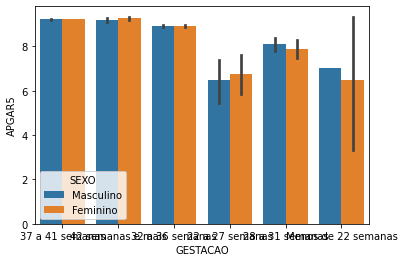

In [31]:
sns.barplot(x='GESTACAO', y='APGAR5', hue='SEXO',data=df);

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [7]:
freq = pd.crosstab(df['GESTACAO'],df['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,1,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,44,151,1415,13563,7281
42 semanas e mais,1,0,0,0,0,1,1,5,44,422,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [9]:
perc_lin = freq.div(freq.sum(axis=1),axis=0)

In [10]:
perc_lin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000896,0.000896,0.000448,0.000896,0.003583,0.004926,0.007613,0.025078,0.162114,0.585311,0.208240
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000933,0.001954,0.006707,0.062847,0.602398,0.323384
42 semanas e mais,0.001435,0.000000,0.000000,0.000000,0.000000,0.001435,0.001435,0.007174,0.063128,0.605452,0.319943
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

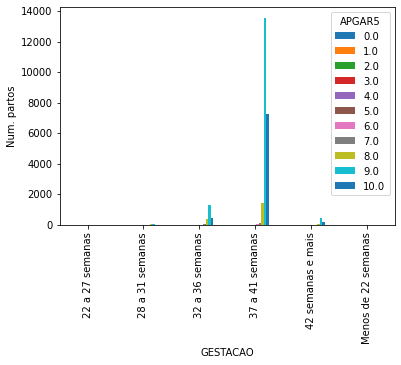

In [24]:
freq.plot.bar(ylabel='Num. partos');

### Não corrobora porque o grafico apenas mostra o numero de nascimentos por periodo.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [45]:
df.loc[df['PESO']<=1000,'tipo_peso']='abaixo'
df.loc[(df['PESO']>=1001) & (df['PESO']<=2000),'tipo_peso']='minimo'
df.loc[(df['PESO']>=2001) & (df['PESO']<=3000),'tipo_peso']='medio'
df.loc[(df['PESO']>=3001) & (df['PESO']<=4000),'tipo_peso']='normal'
df.loc[df['PESO']>4000,'tipo_peso']='acima'

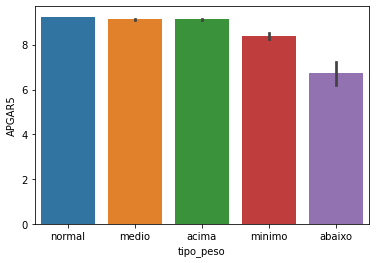

In [50]:
sns.barplot(x='tipo_peso',y='APGAR5',data=df);